In [1]:
import numpy as np
import nibabel as nb
import pandas as pd
import os.path as op
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.formula.api as smf

%matplotlib inline

In [2]:
home_dir = op.abspath('./')

#plotting settings
fontsize = 18
ticksize = fontsize*.8
sns.set_context('talk')
sns.__version__

'0.13.2'

In [3]:
bad_subs = ['Da216','Da220','Da395']

In [4]:
artery = op.join(home_dir,
                'niftis',
                 'vesselProbabilities_3mm_susan_8.nii.gz')
artery = nb.load(artery).get_fdata()



mask_dir = op.join(home_dir,
                      'niftis',
                      'shell_analysis')
mask_ids = {'nacc_3mm':0,
            'nacc_caud_1':1,
            'nacc_caud_2':2,
            'nacc_caud_3':3,
           'nacc_put_1':1,
            'nacc_put_2':2,
            'nacc_put_3':3}
masks = {}
for mask in mask_ids.keys():
    if 'caud' in mask:
        
        masks[mask] = nb.load(op.join(mask_dir,
                            mask + '.nii.gz')).get_fdata().astype(bool)
    else:
        masks[mask] = nb.load(op.join(mask_dir,
                            mask + '.nii.gz')).get_fdata().astype(bool)

    

### load data for top plot

In [5]:
shell_df = pd.read_csv('./csvs/shell_data_dopa.csv')
shell_df = shell_df[shell_df['drug'] == 'plac']
print(len(set(shell_df['sub'])))

for bad_sub in bad_subs:
    shell_df = shell_df[shell_df['sub'] !=bad_sub]
print(len(set(shell_df['sub'])))


76
73


### load data for bottom left plot

In [6]:
#load arterial data for figure
art_df = pd.read_csv('./csvs/artery_data.csv')
art_df = art_df[art_df['drug'] == 'plac']

print(len(set(art_df['sub'])))
for bad_sub in bad_subs:
    art_df = art_df[art_df['sub'] !=bad_sub]
print(len(set(art_df['sub'])))


76
73


### load data for bottom middle plot

In [7]:
artery_spatial = []
for mask in mask_ids.keys():
                
    if mask == 'nacc_3mm':
        roi = 'NAcc'
    elif 'caud' in mask:
        roi = 'Caudate'
    elif 'put' in mask:
        roi = 'Putamen'
                                    
    median= np.median(artery[masks[mask]])


    sub_df = pd.DataFrame({
                          'mask':roi,
                          'artery':median,
                           'distance':mask_ids[mask]
                          }, index = [0])
    artery_spatial.append(sub_df)
artery_spatial = pd.concat(artery_spatial)

In [8]:
colors = ['#026C6D',
          '#FF8A8A', 
        '#FFB1B1',
        '#FFD8D8']


### load data for bottom right plot

In [9]:
mask_map = {'nacc':'NAcc',
           'caudate':'Caudate',
           'putamen':'Putamen',
           'S1':'S1',
           'OT':'OTC'}
lag_df = pd.read_csv('./csvs/striatum_region_lag_data.csv')
lag_df['mask'] = [mask_map[x] for x in lag_df['mask']]

print(len(set(lag_df['sub'])))
for bad_sub in bad_subs:
    lag_df = lag_df[lag_df['sub'] !=bad_sub]
print(len(set(lag_df['sub'])))


76
73


In [10]:
artery_regional = []

mask_dir = op.join(home_dir,
                      'niftis',
                      'shell_analysis')

mask_ids = {'nacc_3mm':'NAcc',
            'putamen_3mm':'Putamen',
            'caudate_3mm':'Caudate'}


regional_mask = []

for mask in mask_ids.keys():
        
    mask_bool = nb.load(op.join(mask_dir,
                            mask + '.nii.gz')).get_fdata().astype(bool)
    
    median= np.median(artery[mask_bool])
        
    sub_df = pd.DataFrame({
                           'mask':mask_ids[mask],
                           'artery':median,
                           }, index = [0])
    regional_mask.append(sub_df.copy())
regional_mask = pd.concat(regional_mask)

In [11]:
msc_lags = pd.read_csv('./csvs/scrubbed_MSC.csv')

### Make figure


/var/folders/bn/dzh1ysw54m9cq4n3dnb30ldw0000gn/T/ipykernel_12869/3531757152.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x = 'distance',


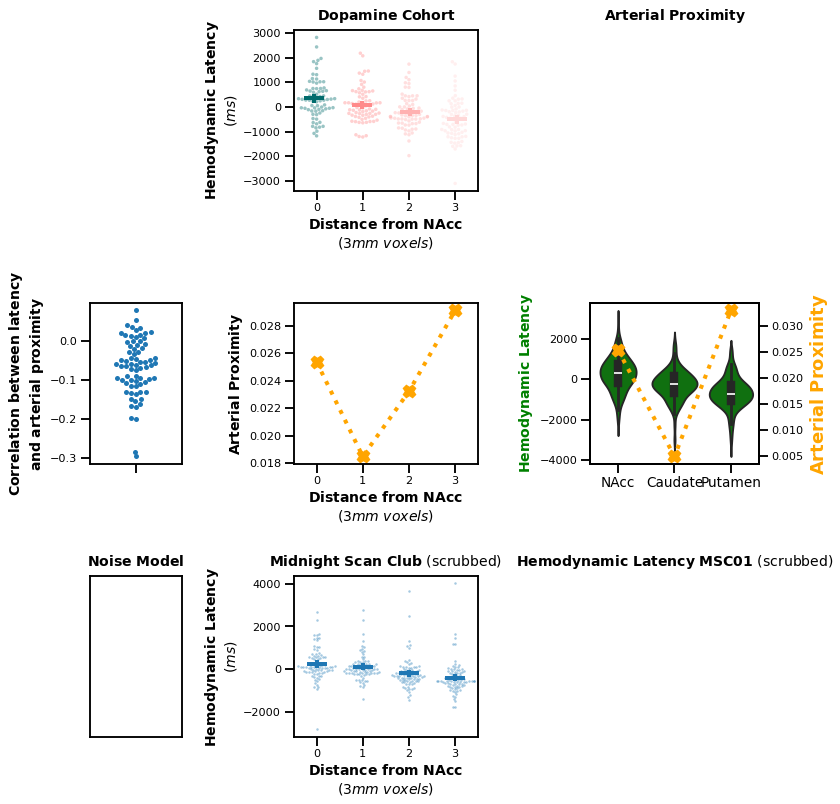

In [12]:
#plotting settings
plt.rcParams['axes.titlepad'] = 10

fontsize = 14
ticksize = fontsize*.8
figy = 4
width = 16
sns.set_context('talk')
plt.rcParams['legend.title_fontsize'] = fontsize


fig,ax=plt.subplots(3,3,
                    figsize=(12,13),
                    width_ratios=[1.5, 3,2.75],
                    sharex=False,
                    sharey=False)

for i in range(3):
    for j in range(3):
        ax[i][j].tick_params(labelsize=ticksize)
        ax[i][j].xaxis.get_label().set_fontsize(fontsize)
        ax[i][j].yaxis.get_label().set_fontsize(fontsize)

##################
####Top Middle######
##################
sns.pointplot(x = 'distance',
             y = 'lag',
              hue = 'distance',
              palette = colors,
            legend = False,
              errorbar = 'se',
              marker="_", 
              markersize=20, 
              markeredgewidth=4,
              dodge = True,
                   ax = ax[0][1],
             data = shell_df)
sns.swarmplot(x = 'distance',
             y = 'lag',
            legend = False,
              palette = colors,
            size = 3.5,
                   ax = ax[0][1],
                   alpha = .4,
             data = shell_df)


ax[0][1].set(ylabel = '$\\bf{Hemodynamic\ Latency}$\n$\it{(ms)}$',
            xlabel = '$\\bf{Distance\ from\ NAcc}$\n$\it{(3mm\ voxels)}$')

ax[0][1].set_title('$\\bf{Dopamine\ Cohort}$', fontsize=fontsize)
##################
###Middle Left#####
##################

sns.swarmplot(
             y = 'corr',
    ax = ax[1][0],
    data = art_df)
ax[1][0].set(ylabel = '$\\bf{Correlation\ between\ latency}$\n$\\bf{and\ arterial\ proximity}$')
            
##################
####Middle Middle#
##################
a = artery_spatial.groupby('distance')['artery'].mean().reset_index()
sns.pointplot(x = 'distance',
             y = 'artery',
              markers ='X',
                            linestyles=':',
              color = 'orange',
              ax = ax[1][1],
             data = a)

ax[1][1].set(ylabel = '$\\bf{Arterial\ Proximity}$',
            xlabel = '$\\bf{Distance\ from\ NAcc}$\n$\it{(3mm\ voxels)}$')

##################
####Middle Right###
##################
g = sns.violinplot(x = 'mask',
             y = 'lag',
              order = ['NAcc','Caudate','Putamen'],
              color= 'green',
              ax = ax[1][2],
             data = lag_df)
ax[1][2].set(xlabel = '',
            ylabel = '$\\bf{Hemodynamic\ Latency}$')
ax[1][2].tick_params(axis = 'x',
                    labelsize=fontsize*.97)
ax[1][2].yaxis.label.set_color('green')

ax2 = g.twinx()

sns.pointplot(x = 'mask',
             y = 'artery',
             errorbar=('ci', 0),
              markers = 'X',
              color = 'orange',
              linestyles=':',
              ax= ax2,
             data = regional_mask)
ax2.set(ylabel ='$\\bf{Arterial\ Proximity}$')
ax2.yaxis.get_label().set_color('orange')
ax2.tick_params(axis = 'y',
                    labelsize=ticksize)

##################
####Bottom Middle###
##################
sns.pointplot(x = 'distance',
             y = 'lag',
            legend = False,
              errorbar = 'se',
              marker="_", 
              markersize=20, 
              markeredgewidth=4,
              linestyle = 'none',
              dodge = True,
                   ax = ax[2][1],
             data = msc_lags)
sns.swarmplot(x = 'distance',
             y = 'lag',
            legend = False,
            size = 2.5,
                   ax = ax[2][1],
                   alpha = .4,
             data = msc_lags)


ax[2][1].set(ylabel = '$\\bf{Hemodynamic\ Latency}$\n$\it{(ms)}$',
            xlabel = '$\\bf{Distance\ from\ NAcc}$\n$\it{(3mm\ voxels)}$',
            )
ax[2,1].set_title('$\\bf{Midnight\ Scan\ Club}$ (scrubbed)',
                  fontsize=fontsize)



ax[2,0].set_title('$\\bf{Noise\ Model}$',
                  fontsize=fontsize)
ax[0,0].axis('off')
ax[0,2].axis('off')
ax[2,0].set_xticks([], [])
ax[2,0].set_yticks([], [])
ax[2,2].axis('off')
ax[0,2].set_title('$\\bf{Arterial\ Proximity}$',
                  fontsize=fontsize)
ax[2,2].set_title('$\\bf{Hemodynamic\ Latency\ MSC01}$ (scrubbed)',
                  fontsize=fontsize)

plt.subplots_adjust(hspace = .7,
                   wspace= .75)
plt.savefig('../figs/paper/fig1_figs.png',
                            bbox_inches = 'tight',
            dpi = 300)

### Statistical analyses

In [13]:
#lag as a function of distance
md = smf.mixedlm("lag ~ distance", 
                 shell_df,
                 groups=shell_df['sub']).fit()
md.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
=============================================================
Model:              MixedLM  Dependent Variable:  lag        
No. Observations:   292      Method:              REML       
No. Groups:         73       Scale:               211244.9057
Min. group size:    4        Log-Likelihood:      -2268.3870 
Max. group size:    4        Converged:           Yes        
Mean group size:    4.0                                      
-------------------------------------------------------------
            Coef.    Std.Err.    z    P>|z|  [0.025   0.975] 
-------------------------------------------------------------
Intercept    367.830   82.725   4.446 0.000  205.692  529.968
distance    -284.899   24.057 -11.843 0.000 -332.050 -237.747
Group Var 351699.760  169.180                                
=============================================================

"""

In [14]:
#lag as a function of distance when controlling for artery
a = artery_spatial.groupby('distance')['artery'].mean().reset_index()

fig_df = pd.merge(shell_df,
        a,
        on= 'distance')

md = smf.mixedlm("lag ~  distance + artery", 
                 fig_df,
                 groups=fig_df['sub']).fit()
md.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
             Mixed Linear Model Regression Results
================================================================
Model:               MixedLM   Dependent Variable:   lag        
No. Observations:    292       Method:               REML       
No. Groups:          73        Scale:                212075.6674
Min. group size:     4         Log-Likelihood:       -2258.4196 
Max. group size:     4         Converged:            Yes        
Mean group size:     4.0                                        
----------------------------------------------------------------
            Coef.    Std.Err.    z    P>|z|   [0.025     0.975] 
----------------------------------------------------------------
Intercept    433.304  190.312   2.277 0.023     60.299   806.309
distance    -280.058   27.231 -10.284 0.000   -333.431  -226.686
artery     -3023.380 7913.631  -0.382 0.702 -18533.812 12487.053
Group Var 351492.493  168.946                                   
================================================================

"""

In [15]:
#regional NAcc differences
fig_df = pd.merge(regional_mask,
                  lag_df,
                  on = 'mask')
md = smf.mixedlm("lag ~  C(mask,  Treatment(reference='NAcc'))", 
                 fig_df,
                 groups=fig_df['sub']).fit()
md.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Mixed Linear Model Regression Results
====================================================================================================
Model:                           MixedLM               Dependent Variable:               lag        
No. Observations:                657                   Method:                           REML       
No. Groups:                      73                    Scale:                            459127.6190
Min. group size:                 9                     Log-Likelihood:                   -5248.5550 
Max. group size:                 9                     Converged:                        Yes        
Mean group size:                 9.0                                                                
----------------------------------------------------------------------------------------------------
                                                  Coef.    Std.Err.    z    P>|z|   [0.025   0.975] 
----------------------------------------------------------------------------------------------------
Intercept                                          271.808   64.426   4.219 0.000   145.534  398.081
C(mask, Treatment(reference='NAcc'))[T.Caudate]   -545.022   64.753  -8.417 0.000  -671.935 -418.108
C(mask, Treatment(reference='NAcc'))[T.Putamen]   -947.766   64.753 -14.637 0.000 -1074.680 -820.853
Group Var                                       149963.535   52.405                                 
====================================================================================================

"""

In [16]:
#lags correlation with arterial proximity
art_df['corr_fisher'] = [np.arctanh(x) for x in art_df['corr']]
scipy.stats.ttest_1samp(art_df['corr_fisher'],0)

md = smf.ols("corr_fisher ~  1", 
                 art_df).fit()
md.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            corr_fisher   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 19 Mar 2025   Prob (F-statistic):                nan
Time:                        12:19:04   Log-Likelihood:                 86.698
No. Observations:                  73   AIC:                            -171.4
Df Residuals:                      72   BIC:                            -169.1
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0674      0.009     -7.749      0.000      -0.085      -0.050
==============================================================================
Omnibus:                        8.844   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                8.514
Skew:                          -0.707   Prob(JB):                       0.0142
Kurtosis:                       3.896   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
#MSC lag as a function of distance
md = smf.mixedlm("lag ~ distance", 
                 msc_lags,
                 groups=msc_lags['sub']).fit()
md.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
           Mixed Linear Model Regression Results
============================================================
Model:             MixedLM  Dependent Variable:  lag        
No. Observations:  336      Method:              REML       
No. Groups:        9        Scale:               408063.6945
Min. group size:   32       Log-Likelihood:      -2647.1866 
Max. group size:   40       Converged:           Yes        
Mean group size:   37.3                                     
------------------------------------------------------------
            Coef.    Std.Err.   z    P>|z|  [0.025   0.975] 
------------------------------------------------------------
Intercept    270.780  128.172  2.113 0.035   19.568  521.993
distance    -223.264   31.170 -7.163 0.000 -284.356 -162.172
Group Var 117165.279  101.944                               
============================================================

"""